In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
wordle_to_golf_score = {
        '1': -10,
        '2': -3,
        '3': -1,
        '4': 0,
        '5': 1,
        '6': 2,
        'X': 4,
        }

In [3]:
# First, let's load the wordle scores
scores_df = pd.read_csv("wordle_scores")

# And clean them up...
# Textra wrote out my scores as "me", let's get them back to "david"
scores_df.name = scores_df.name.replace(['me'],'david')

# Add a week column to the dataframe
scores_df['week'] = (scores_df.puzzle_number-302) // 7

# Map the wordle score to the corresponding golf score
scores_df['golf_score'] = scores_df['score'].map(wordle_to_golf_score)

In [4]:
counted_df = scores_df.groupby(["name", "score"]).count().reset_index()
counted_df = counted_df.rename(columns={"puzzle_number": "count"})

In [18]:
scores_df.groupby("name").golf_score.count()

name
daniel    234
david     256
doug      256
jamie     254
lisa      250
madre     254
Name: golf_score, dtype: int64

In [42]:
score_prob_df = scores_df.groupby(["name", "score"]).golf_score.count() / scores_df.groupby("name").golf_score.count()
score_prob_df = score_prob_df.reset_index()
score_prob_df = score_prob_df.rename(columns={"golf_score": "probability"})

<AxesSubplot: xlabel='score', ylabel='probability'>

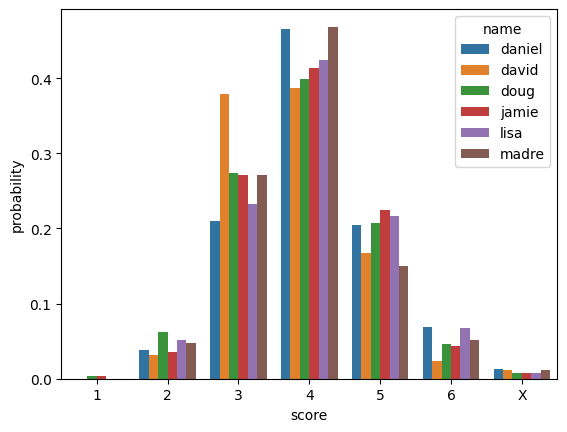

In [45]:
sns.barplot(data=score_prob_df, x="score", y="probability", hue="name", order=["1", "2", "3", "4", "5", "6", "X"])

In [6]:
def calculate_win_count(scores_df, max_week):
    # We're going to count the number of wins for each person, the create a bar chart.
    scores_df = scores_df[scores_df.week < max_week]

    # Create a variable to keep track of each person's number of wins. And initialize it for each person to zero.
    win_count = {}
    for name in scores_df.name.unique():
        win_count[name] = 0

    # Determine the winner's for each week. We're okay with friendly ties.
    for week_idx, week_scores_df in scores_df.groupby("week"):
        summed_scores_df = week_scores_df.groupby("name").sum()
        winning_players = summed_scores_df[summed_scores_df.golf_score == summed_scores_df.golf_score.min()].index.tolist()

        for name in winning_players:
            win_count[name] = win_count[name] + 1

    return win_count

calculate_win_count(scores_df, 36)

In [9]:
week_scores_df = scores_df.groupby(["week", "name"]).golf_score.sum()

# Top 5
print(f"Top 5: \n{week_scores_df.sort_values(ascending=True).head(5)}")

# Bottom 5
print(f"Bottom 5: \n{week_scores_df.sort_values(ascending=False).head(5)}")

Top 5: 
week  name 
13    jamie   -14
34    doug    -11
5     lisa     -8
31    jamie    -8
29    doug     -8
Name: golf_score, dtype: int64
Bottom 5: 
week  name 
11    doug     6
2     lisa     6
      jamie    6
15    madre    6
25    doug     5
Name: golf_score, dtype: int64


In [13]:
player_dfs = []
for name, score_df in scores_df.groupby("name"):
    score_df = score_df.sort_values("puzzle_number", ascending=True)
    score_df['cumscores'] = score_df.golf_score.cumsum()
    player_dfs.append(score_df)
    
players_df = pd.concat(player_dfs)

      puzzle_number score    name  week  golf_score  cumscores
365             303     2  daniel     0          -3         -3
372             304     4  daniel     0           0         -3
378             305     5  daniel     0           1         -2
382             306     4  daniel     0           0         -2
389             307     2  daniel     0          -3         -5
...             ...   ...     ...   ...         ...        ...
1483            554     3   madre    36          -1        -31
1487            555     5   madre    36           1        -30
1494            556     4   madre    36           0        -30
1497            557     5   madre    36           1        -29
1502            558     4   madre    36           0        -29

[1504 rows x 6 columns]


In [14]:
players_df = players_df.sort_values("puzzle_number", ascending=True)
px.line(players_df, x='puzzle_number', y='cumscores', color='name')